In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Função para importar as cotações de uma lista de ativos 

In [3]:
def historical_price_list(ticker_list, start_date):
    """ importa o preco historico de uma lista de ativos 
    
    """
    df=pd.DataFrame()
    precos=pd.DataFrame()

    import datetime as dt
    end_date =dt.datetime.today().strftime('%Y-%m-%d')

    for ticker in ticker_list:
        precos = yf.download(ticker, start_date, end_date)['Close']
        df = pd.concat([df,precos],axis=1)
    df.columns=ticker_list

    return df

# Input - importando preços

In [4]:
acao_list=['PETR4.SA','ITUB4.SA','AGRO3.SA']
data_ini = '2022-04-02'

df = historical_price_list(acao_list,data_ini)
df.head(2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PETR4.SA,ITUB4.SA,AGRO3.SA
2022-04-04 00:00:00-03:00,32.700001,27.290001,32.189999
2022-04-05 00:00:00-03:00,32.389999,26.740000,33.000000


# Calculando as metricas dos portfolios

In [7]:
# CALCULANDO Os RETORNOS

retorno = df/df.shift(-1)
retorno.dropna()

# CALCULANDO O LOG DOS RETORNOS
log_ret = np.log(retorno)
stocks = df

np.random.seed(42)
#-----------------------------------
# NUMERO DE PORTFOLIOS  NA SIMULAÇÃO

num_ports = 1000

#----------------------------------
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

#--------------------------------------
# CALCULANDO O RETORNO, RISCO E SHARPE DOS PORTIFOLIOS

for x in range(num_ports):
    # PESOS
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights)
    
    # GUARDANDO OS PESOS
    all_weights[x,:] = weights
    
    # RETORNO ESPERADO
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # VOLATILIDADE ESPERADA
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # INDICE SHARPE
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
    # MAXIMO SHARPE

print('O MAIOR INDICE SHARPE DO VETOR É : {}'.format(sharpe_arr.max().round(2)))

# ENCONTRANDO A POSIÇÃO DELE NO VETOR
ind = sharpe_arr.argmax()

# ENCONTRANDO OS PESOS DE CADA ATIVO NA CARTEIRA
print('os pesos dos ativos na carteira sao: {}'.format(all_weights[ind,:].round(2)))

max_sr_ret = ret_arr[ind]
max_sr_vol = vol_arr[ind]

O MAIOR INDICE SHARPE DO VETOR É : 0.58
os pesos dos ativos na carteira sao: [0.56 0.01 0.43]


# Grafico portfolios e max_sharpe

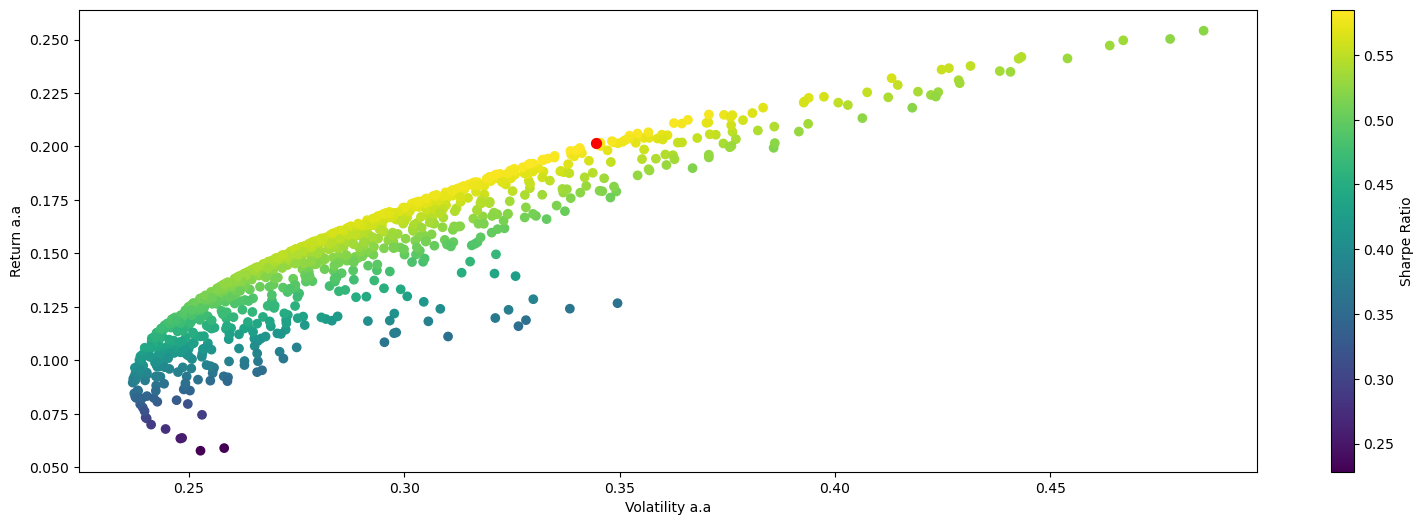

In [12]:
plt.figure(figsize=(19,6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility a.a')
plt.ylabel('Return a.a')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()